<a href="https://colab.research.google.com/github/ssyeon2/kt-aivle/blob/main/March/03.13/SEN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- MinMaxScaling

In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
min_n, max_n = train_x.min(), train_x.max()
train_x = (train_x - min_n)/(max_n - min_n)
test_x = (test_x - min_n)/(max_n - min_n)

In [5]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

- Reshape

In [6]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

print(train_x.shape, test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


- to_categorical

In [7]:
from tensorflow.keras.utils import to_categorical
len_n = len(set(train_y))
train_y = to_categorical(train_y, len_n)
test_y = to_categorical(test_y, len_n)

In [16]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model

--------------------------------------------------------------
1. 인풋 레이어
2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
5. BatchNormalization
6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
7. DropOut : 25% 비활성화
8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
9. BatchNormalization
10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
11. BatchNormalization
12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
13. DropOut : 25% 비활성화
14. Flatten
15. Fully Connected Layer : 노드 512개
16. BatchNormalization
17. 아웃풋 레이어
--------------------------------------------------------------

In [9]:
# Seqeuntial()

# 세션 클리어
clear_session()

# 모델 선언
model = Sequential()

# 모델 블록 조립
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters = 32,              # 새롭게 제적하려는 feature map의 수
                 kernel_size = (3,3),       # 훝는 필터의 가로 세로 사이즈
                 strides = (1,1),           # 필터가 훑기 이전 사이즈를 유지하려는 기법
                 padding = 'same',          # 필터가 훓기 전 이전 사이즈로 유지하려는 기법
                 activation = 'relu'))      # 주의!!!
model.add(BatchNormalization())             
model.add(Conv2D(filters = 32,              # 새롭게 제적하려는 feature map의 수
                 kernel_size = (3,3),       # 훝는 필터의 가로 세로 사이즈
                 strides = (1,1),           # 필터가 훑기 이전 사이즈를 유지하려는 기법
                 padding = 'same',          # 필터가 훓기 전 이전 사이즈로 유지하려는 기법
                 activation = 'relu'))      # 주의!!!
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),      # pooling filter의 가로 세로 사이즈
                    strides = (2,2)))       # pooling filter가 어떻게 이동할 것인지
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),      # pooling filter의 가로 세로 사이즈
                    strides = (2,2)))       # pooling filter가 어떻게 이동할 것인지
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(train_y.shape[1], activation = 'softmax'))

# cmompile
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
             optimizer = 'adam')

# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [11]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, epochs=10000, batch_size=128,
             validation_split=0.2, callbacks = [es], verbose=1)

Epoch 1/10000
375/375 [==============================] - 17s 8ms/step - loss: 0.4018 - accuracy: 0.8573 - val_loss: 2.2672 - val_accuracy: 0.4161
Epoch 2/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2679 - accuracy: 0.9022 - val_loss: 0.2955 - val_accuracy: 0.8910
Epoch 3/10000
375/375 [==============================] - 2s 7ms/step - loss: 0.2283 - accuracy: 0.9162 - val_loss: 0.2515 - val_accuracy: 0.9097
Epoch 4/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2043 - accuracy: 0.9250 - val_loss: 0.2041 - val_accuracy: 0.9273
Epoch 5/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1842 - accuracy: 0.9309 - val_loss: 0.2364 - val_accuracy: 0.9184
Epoch 6/10000
375/375 [==============================] - 2s 7ms/step - loss: 0.1685 - accuracy: 0.9386 - val_loss: 0.2015 - val_accuracy: 0.9275
Epoch 7/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1523 - accuracy: 0.9439 - val_loss: 0.1997 - val_a

In [12]:
model.evaluate(train_x, train_y)
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9224


[0.2253710925579071, 0.9223999977111816]

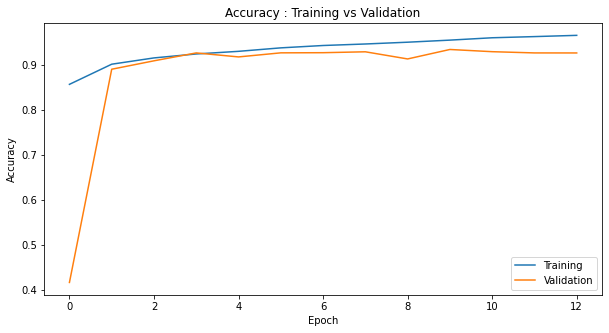

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

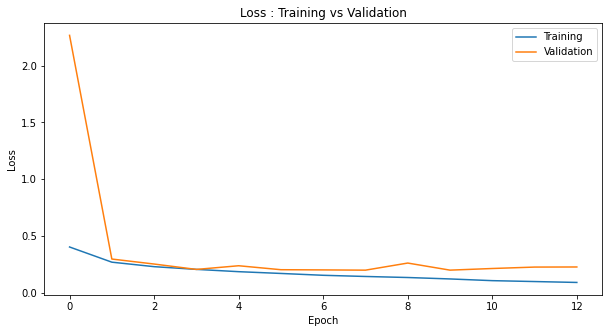

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [19]:
# Functioanl()

# 세션 클리어
clear_session()

# layer 엮기
il = Input(shape=(28,28,1))
cl = Conv2D(filters = 32, 
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu')(il)
bl = BatchNormalization()(cl)
cl = Conv2D(filters = 32, 
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu')(bl)
bl = BatchNormalization()(cl)
pl = MaxPool2D(pool_size=(2,2),
               strides = (2,2))(bl)
dl = Dropout(0.25)(pl)


cl = Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu')(dl)
bl = BatchNormalization()(cl)
cl = Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 strides = (1,1), 
                 padding = 'same', 
                 activation = 'relu')(bl)
bl = BatchNormalization()(cl)
pl = MaxPool2D(pool_size=(2,2),
               strides = (2,2))(bl)
dl = Dropout(0.25)(pl)

fl = Flatten()(dl)
hl = Dense(512, activation = 'relu')(fl)
bl = BatchNormalization()(hl)
ol = Dense(train_y.shape[1], activation = 'softmax')(bl)

# 모델 처음 끝 지정
model = Model(il, ol)

# cmompile
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
             optimizer = 'adam')

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

In [20]:
hist = model.fit(train_x, train_y, validation_split=0.2, 
                 batch_size = 128, epochs = 10000, callbacks = [es], verbose = 1)

Epoch 1/10000
375/375 [==============================] - 6s 8ms/step - loss: 0.4054 - accuracy: 0.8549 - val_loss: 1.7425 - val_accuracy: 0.4817
Epoch 2/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2733 - accuracy: 0.9002 - val_loss: 0.2584 - val_accuracy: 0.9086
Epoch 3/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2298 - accuracy: 0.9146 - val_loss: 0.2424 - val_accuracy: 0.9103
Epoch 4/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2050 - accuracy: 0.9244 - val_loss: 0.2309 - val_accuracy: 0.9164
Epoch 5/10000
375/375 [==============================] - 2s 7ms/step - loss: 0.1854 - accuracy: 0.9320 - val_loss: 0.2227 - val_accuracy: 0.9192
Epoch 6/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1720 - accuracy: 0.9346 - val_loss: 0.2282 - val_accuracy: 0.9196
Epoch 7/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1546 - accuracy: 0.9430 - val_loss: 0.2387 - val_ac

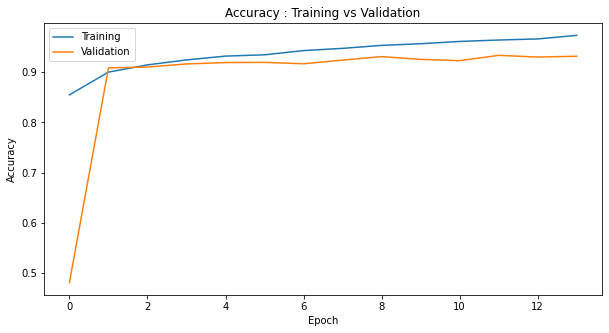

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

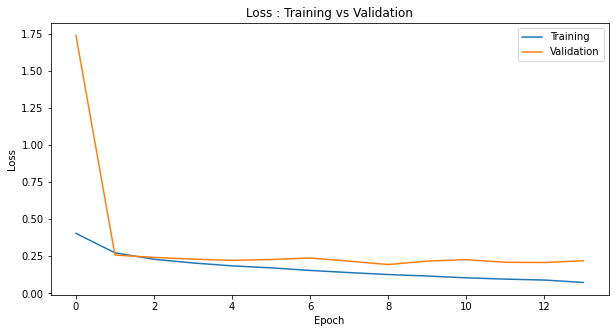

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
model.evaluate(train_x, train_y)
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2171 - accuracy: 0.9274


[0.21712668240070343, 0.9273999929428101]